In [1]:
#   -- import --
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
from descartes import PolygonPatch

#   -- input --
sf = shapefile.Reader("./omavalitsus_shp/omavalitsus_20160501")

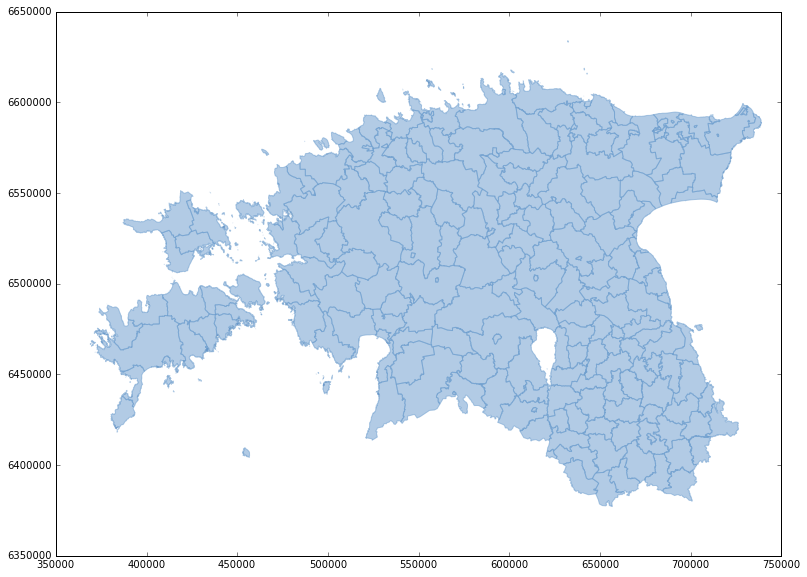

In [2]:
BLUE = '#6699cc'

def add_polygon_patch(ax, poly):
    if poly["type"] == 'Polygon':
        ax.add_patch(PolygonPatch(poly, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
    elif poly["type"] == 'MultiPolygon':
        for coords in poly["coordinates"]:
            poly_part = {'type':'Polygon','coordinates':coords}
            ax.add_patch(PolygonPatch(poly_part, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
    else:
        print("Ooh Noo!")


fig = plt.figure(figsize=(13,10)) 
ax = fig.gca() 

for shape in sf.shapes():
    poly = shape.__geo_interface__
    add_polygon_patch(ax, poly)

ax.axis('scaled')
plt.show()